In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('googleplaystore.csv',encoding="ISO-8859-1")

In [2]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
dataset[dataset['Reviews']=='3.0M']
#dataset[dataset['Reviews']=='3.0M'] = float(3000000)
#dataset[['Reviews']].apply(pd.to_numeric())
#dataset.Reviews = pd.to_numeric(dataset.Reviews)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [4]:
dataset[dataset['Reviews']=='3.0M'] = float(3000000)
dataset.Reviews.describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

In [5]:
dataset.Reviews = pd.to_numeric(dataset.Reviews)
dataset.Reviews.describe()

count    1.084100e+04
mean     4.443887e+05
std      2.927728e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.479800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [6]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
dataset.Price.describe()

count     10841
unique       93
top           0
freq      10040
Name: Price, dtype: object

In [7]:
dataset[dataset['Type']!='Free']['Price']

234       $4.99
235       $4.99
290       $4.99
291       $4.99
427       $3.99
476       $3.99
477       $6.99
478       $1.49
479       $2.99
480       $3.99
481       $7.99
571       $3.99
851       $3.99
852       $5.99
853       $3.99
854       $3.99
995       $4.99
1001      $2.99
1227      $3.49
1228      $4.99
1327      $2.99
1335      $3.99
1341      $2.99
1347      $2.99
1831      $2.99
1832      $1.99
1833      $4.99
1834      $4.99
1835      $4.99
1836      $5.99
          ...  
10457     $2.99
10459     $1.99
10460     $1.00
10472     3e+06
10517     $1.49
10531     $3.49
10540     $2.99
10570     $1.99
10583     $6.99
10586     $0.99
10594     $1.99
10645     $8.99
10650     $5.49
10651     $6.49
10661     $5.99
10662     $6.49
10664     $6.49
10668     $6.49
10669     $5.99
10674     $5.49
10675     $0.99
10679     $2.99
10682     $0.99
10690     $0.99
10697     $0.99
10735     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
10798     $1.04
Name: Price, Length: 802

In [8]:
dataset['Price'][10472] 

3000000.0

In [9]:
#a partir da célula para mostrar os valores de preço que não fossem de apps gratuitos,
#viu-se um valor de preço muito alto e verifico quais os valores dessa linha
dataset[dataset['Price']==3000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,3e+06,3e+06,3000000.0,3000000.0,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06


In [11]:
len(dataset)

10840

In [10]:
dataset = dataset.drop(dataset[dataset['Price']==3000000].index, axis = 0)

In [13]:
dataset[dataset['Price']==3000000] #para verificar se foi feita a remoção

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
dataset.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [13]:
dataset.columns[dataset.isna().any()].tolist()#quais colunas possuem valores NaN

['Rating', 'Type', 'Current Ver', 'Android Ver']

In [14]:
dataset[dataset['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [15]:
dataset[dataset['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35.0,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30.0,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161.0,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2.0,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114.0,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [16]:
dataset[dataset['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0.0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44.0,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1.0,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8.0,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [17]:
dataset[dataset['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [18]:
dataset['Type'] = dataset['Type'].astype("category")
dataset['Content Rating'] = dataset['Content Rating'].astype("category") 
dataset['Category'] = dataset['Category'].astype("category") 

In [19]:
dataset.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size                object
Installs            object
Type              category
Price               object
Content Rating    category
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [20]:
dataset.corr(method='spearman')
#dataset['App'] = dataset['App'].astype('str')
#dataset.dtypes

,Rating,Reviews
Rating,1.00000,0.15649
Reviews,0.15649,1.00000


In [21]:
#teste de hipótese para ver média de notas entre apps pagos e gratuitos
apps_free = dataset[dataset['Type']=='Free']['Rating']
apps_paid = dataset[dataset['Type']!='Free']['Rating']
print(len(apps_free))
print(len(apps_paid))

10039
801


In [22]:
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

stats.mannwhitneyu(apps_free,apps_paid)

MannwhitneyuResult(statistic=3447651.5, pvalue=8.01921318202971e-12)

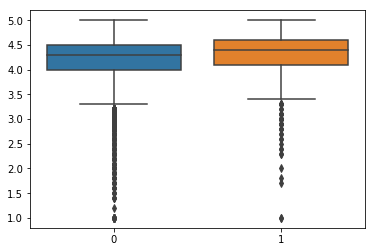

In [23]:
sb.boxplot(data=[apps_free,apps_paid])

In [25]:
print(apps_free.mean())
print(apps_free.median())
print(apps_paid.mean())
print(apps_paid.median())

4.186202546163551
4.3
4.26661514683153
4.4


In [29]:
dataset.Installs = dataset.Installs.str.replace('+','')
dataset.Installs.head()

0        10,000
1       500,000
2     5,000,000
3    50,000,000
4       100,000
Name: Installs, dtype: object

In [38]:
dataset.Installs = dataset.Installs.str.replace('.','')
#dataset.Installs = dataset.Installs.astype("float64")
dataset.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [39]:
dataset.Installs = dataset.Installs.astype("float64")

In [41]:
#teste de hipótese para qtd de instalações entre apps pagos e gratuitos
apps_free = dataset[dataset['Type']=='Free']['Installs']
apps_paid = dataset[dataset['Type']!='Free']['Installs']
stats.mannwhitneyu(apps_free,apps_paid)

MannwhitneyuResult(statistic=1860238.0, pvalue=3.1184694997717143e-143)

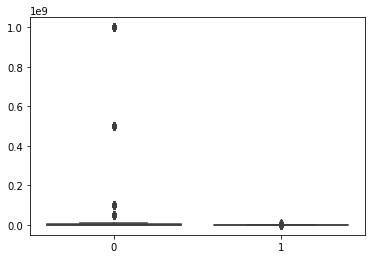

In [42]:
sb.boxplot(data=[apps_free,apps_paid])

In [43]:
print('Pagos: média '+str(apps_paid.mean())+' mediana '+str(apps_paid.median()))
print('Gratuitos: média '+str(apps_free.mean())+' mediana '+str(apps_free.median()))

Pagos: média 91081.24968789014 mediana 1000.0
Gratuitos: média 16690953.023807151 mediana 100000.0
